<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%973.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ИДЗ 3. Нечёткие модели.
####Вариант 11.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

**Задание функции**

In [41]:
#Вид функции: f(t) = (t**3) - 37 * (t**2) + 447 * t - 1755 = (t - 9) * (t - 13) * (t - 15)
def f(t):
  return ((t - 9) * (t - 13) * (t - 15))
#Производная функции f(t)
def df(t):
  return (3 * (t**2) - 74 * t + 447)

Вид функции f(t)



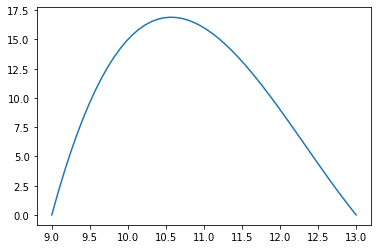

In [42]:
t = np.linspace(9, 13, num = 50)
f_t = f(t)
df_t = df(t)
print('Вид функции f(t)\n')
plt.plot(t, f_t)

**Нахождение уравнений касательных**

In [43]:
#Для примера возьмём из нашей выборки точку под номером 5 и 47
def finding_tangent_equation(num, t0):
  print('Формула касательной имеет вид: y = a * t + b, где')
  print("a = f'(t0)\nb = f(t0) - t0 * f'(t0)")
  a = df(t0)
  b = f(t0) - t0 * df(t0)
  print('При:')
  print("t0 = " + str(round(t0, 4)))
  print('f(t0) = ' + str(round(f(t0), 4)))
  print("f'(t0) = " + str(round(df(t0), 4)))
  print(str(num) + '-е уравнение касательной имеет вид: y = ' + str(round(a, 4)) + ' * t + (' + str(round(b, 4)) + ')\n')
  return a, b

a1, b1 = finding_tangent_equation(1, t[5 - 1])
a2, b2 = finding_tangent_equation(2, t[47 - 1])

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 9.3265
f(t0) = 6.8053
f'(t0) = 17.7893
1-е уравнение касательной имеет вид: y = 17.7893 * t + (-159.1067)

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 12.7551
f(t0) = 2.0644
f'(t0) = -8.7997
2-е уравнение касательной имеет вид: y = -8.7997 * t + (114.3051)



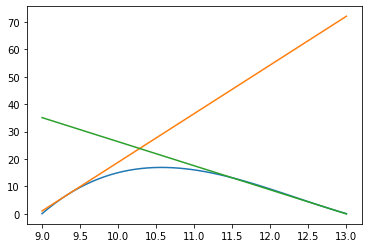

In [44]:
#Функция касательных:
def tangent(a, b, t):
  return (a * t + b)

y1 = tangent(a1, b1, t)
y2 = tangent(a2, b2, t)

plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

##**Фаззификация**

**Построение mu1 и mu2 (касательные по концам промежутков t и f(t)**

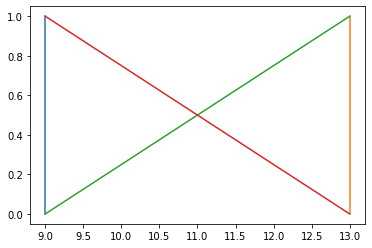

In [45]:
#строится по концам интервалов t=[0,1] и f(t)=[f1,fn]
plt.plot([t[0], t[0]], [0, 1])
plt.plot([t[len(t) - 1], t[len(t) - 1]], [0, 1])
#касательные:
plt.plot([t[0], t[len(t) - 1]], [0, 1])
plt.plot([t[0], t[len(t) - 1]], [1, 0])

**Найдём значения mu1 и mu2**

In [46]:
mu1_a, mu1_b = finding_tangent_equation(1, t[0])
mu2_a, mu2_b = finding_tangent_equation(2, t[len(t) - 1])

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 9.0
f(t0) = 0.0
f'(t0) = 24.0
1-е уравнение касательной имеет вид: y = 24.0 * t + (-216.0)

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 13.0
f(t0) = -0.0
f'(t0) = -8.0
2-е уравнение касательной имеет вид: y = -8.0 * t + (104.0)



In [47]:
mu1 = tangent(mu1_a, mu1_b, t)
mu2 = tangent(mu2_a, mu2_b, t)

##**Дефаззификация**

**Построим нечёткую модель y_ и изобразим эти значения вместе с функцией f(t) и двумя касательными**

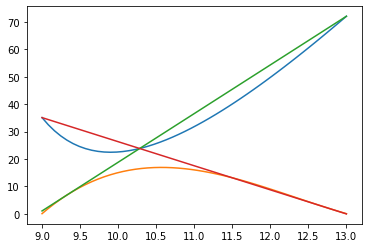

In [48]:
def y_new(t, y1, y2, a1, a2, b1, b2, mu1, mu2):
  return ((mu1 * (a1 * t + b1) + mu2 * (a2 * t + b2)) / (mu1 + mu2))

y_ = y_new(t, y1, y2, a1, a2, b1, b2, mu1, mu2)
plt.plot(t, y_)
plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

**Общая таблица**

In [49]:
data = list(zip(t, f_t, df_t, mu1, mu2, y1, y2, y_))
print(pd.DataFrame(data, columns=["t", "f(t)", "f'(t)", "mu1", "mu2", "y_кас1", "y_кас2", 'y_model']))

            t       f(t)      f'(t)        mu1        mu2     y_кас1     y_кас2    y_model
0    9.000000   0.000000  24.000000   0.000000  32.000000   0.996592  35.108093  35.108093
1    9.081633   1.893089  22.387339   1.959184  31.346939   2.448776  34.389753  32.510872
2    9.163265   3.656164  20.814661   3.918367  30.693878   3.900960  33.671412  30.301172
3    9.244898   5.292489  19.281966   5.877551  30.040816   5.353144  32.953072  28.436720
4    9.326531   6.805328  17.789254   7.836735  29.387755   6.805328  32.234732  26.881173
5    9.408163   8.197945  16.336526   9.795918  28.734694   8.257512  31.516392  25.603117
6    9.489796   9.473604  14.923782  11.755102  28.081633   9.709696  30.798052  24.575258
7    9.571429  10.635569  13.551020  13.714286  27.428571  11.161880  30.079712  23.773768
8    9.653061  11.687103  12.218242  15.673469  26.775510  12.614064  29.361372  23.177750
9    9.734694  12.631472  10.925448  17.632653  26.122449  14.066248  28.643031  22.768805